# Linear Regression Assignment 
### Student Name :- Naveen Kumar

## Business Objective :- 
  - US Boom bike company has seen a dip in their their revenues due to the ongoing Corona pandemic
  - Need to predict the most import drivers which will help Leadership team to make strategic business plan

# 1. Data Understanding 

In [523]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn
import statsmodels
import statsmodels.api as sm
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



pd.set_option('display.max_columns' , 100)
#pd.set_option('display.max_rows' , 100)

In [524]:
bikerentaldf= pd.read_csv('day.csv')
bikerentaldf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [525]:
#checking the information of dataset , there are no null values
bikerentaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [526]:
#describing the data set 
bikerentaldf.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# 2.  Data Visualization 

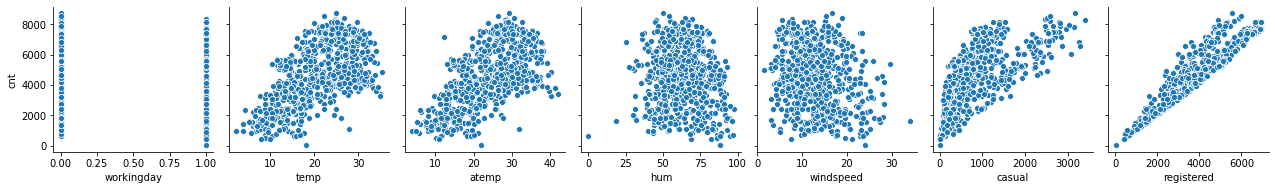

In [527]:
# it shows that there is some correlation with below features , hence linear regression is feasible
# we can see that temp  , casual , registered users more correlated
sns.pairplot(bikerentaldf  , x_vars = [ 'workingday', 'temp' ,'atemp' ,'hum' ,'windspeed' ,'casual' ,'registered'] 
             ,y_vars =  'cnt')
plt.show()

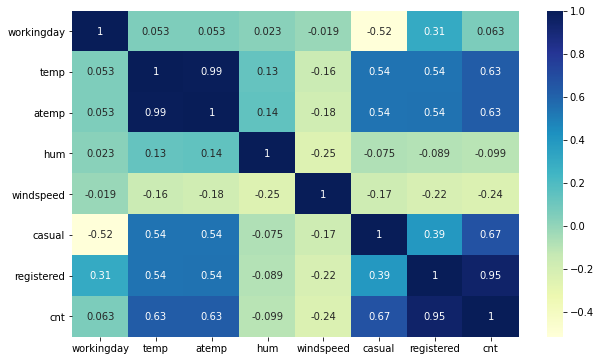

In [528]:
plt.figure(figsize=[10,6])
sns.heatmap(bikerentaldf[ ['workingday', 'temp' ,'atemp' ,'hum' ,'windspeed' ,'casual' ,'registered','cnt']].corr() ,annot=True
           ,cmap = 'YlGnBu')
plt.show()

### As we see that count has highest correlation with Registered-->casual -->temp,atemp
#### Registered and casual are also count of users and we have to make model with total count .. hence temp has the highest coorelation 

In [529]:
#converting to category
bikerentaldf['weathersit'] = bikerentaldf['weathersit'].astype('category')
bikerentaldf['season'] = bikerentaldf['season'].astype('category')
bikerentaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     730 non-null    int64   
 1   dteday      730 non-null    object  
 2   season      730 non-null    category
 3   yr          730 non-null    int64   
 4   mnth        730 non-null    int64   
 5   holiday     730 non-null    int64   
 6   weekday     730 non-null    int64   
 7   workingday  730 non-null    int64   
 8   weathersit  730 non-null    category
 9   temp        730 non-null    float64 
 10  atemp       730 non-null    float64 
 11  hum         730 non-null    float64 
 12  windspeed   730 non-null    float64 
 13  casual      730 non-null    int64   
 14  registered  730 non-null    int64   
 15  cnt         730 non-null    int64   
dtypes: category(2), float64(4), int64(9), object(1)
memory usage: 81.7+ KB


In [530]:
# Creating function to convert numeric to strin vals 
def checkweather(x):
    if x==1:
        return "Clear"
    if x==2:
        return "Mist + Cloudy"
    if x==3:
        return "Light Snow"
    if x==4:
        return "Heavy Rain"

In [531]:
#As mentioned in requirements converting the categorical variables (weather and season)

seasonData= {1:'spring', 2:'summer', 3:'fall', 4:'winter'}

bikerentaldf['season'] = bikerentaldf['season'].map(seasonData)
bikerentaldf.head()

bikerentaldf['weathersit'] = bikerentaldf['weathersit'].apply( lambda x: checkweather(x))
bikerentaldf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [532]:
#Visualization of categorical variable
#we can always visualize bw categorical and continouse to see the relation  , 
def plotboxcategories(columnlist):
    cnt=1;
    plt.figure(figsize=[20,12])
    for i in columnlist:
        plt.subplot(3,3,cnt)
        sns.boxplot(x=i , y = 'cnt' , data = bikerentaldf)
        #plt.show()
        cnt+=1

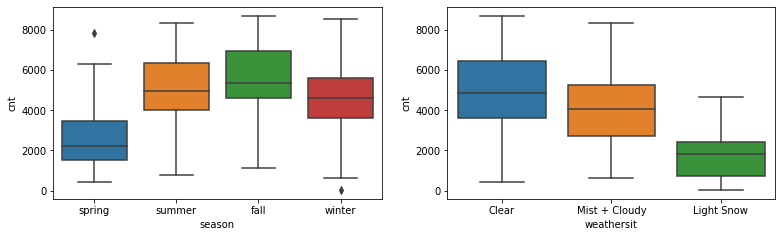

In [533]:
# lets plot the target variable with our categorical variables
# As we can clearly see that there is relation of season and wethersit with target variable.
# better the season more the count of rental bikes
cat_variables = ['season' , 'weathersit']
plotboxcategories(cat_variables)
plt.show()

- As we can clearly see that there is relation of season and wethersit with target variable.
- better the season more the count of rental bikes
- clear the weather , more the count

###  As we can see that weekday and month can also be considered for bike rental analysis

In [534]:
# lets convert month and weekday to categories 
import calendar
bikerentaldf['mnth'] = bikerentaldf['mnth'].apply(lambda x: calendar.month_abbr[x])
dayOfWeek={1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 0:'Sunday'}
bikerentaldf['weekday'] = bikerentaldf['weekday'].map(dayOfWeek)

bikerentaldf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Saturday,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sunday,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


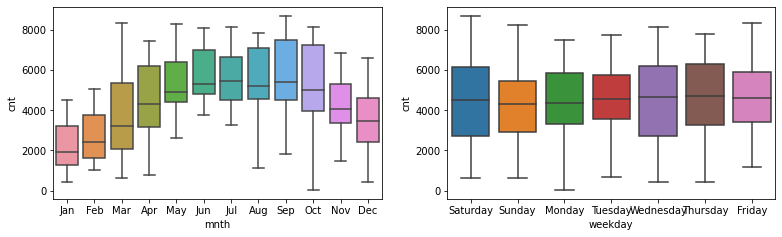

In [535]:
# plottinng the season and weathersit relation with target
# we can huge variation  in month and weekday  , as sept has highest count
num_variables = ['mnth' , 'weekday']
plotboxcategories(num_variables)
plt.show()

#### Observation
- we can see that Sept month has highest count 
- Saturday Thursday and Wednesday count is high


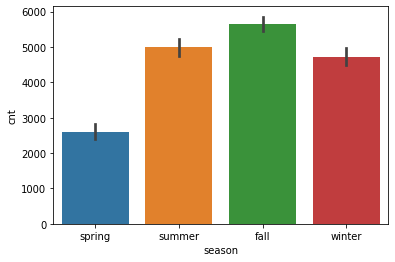

In [536]:
#more count in fall then summer then winter and then spring
sns.barplot(x='season'  , y = 'cnt' ,data = bikerentaldf)
plt.show()

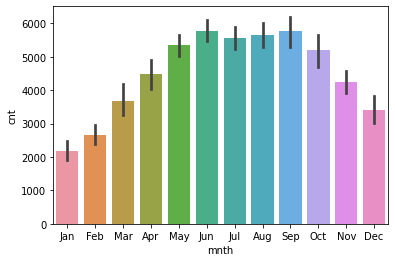

In [537]:
# bike rental count is increasing from jan to Jun , remains constant till sept and then decreasing
sns.barplot(x='mnth'  , y = 'cnt' ,data = bikerentaldf)
plt.show()

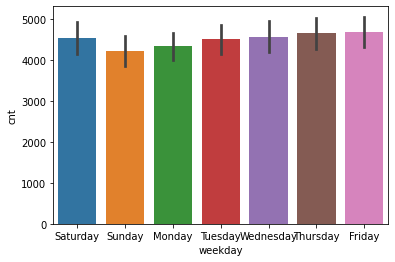

In [538]:
# bike rental count is highest on saturday
sns.barplot(x='weekday'  , y = 'cnt' ,data = bikerentaldf)
plt.show()

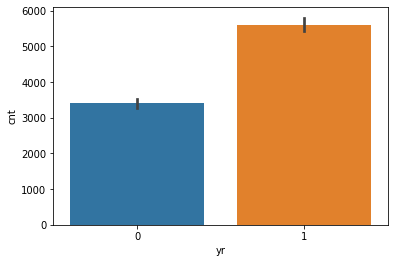

In [539]:
# people rent more bike in 2019 
sns.barplot(x='yr'  , y = 'cnt' ,data = bikerentaldf)
plt.show()

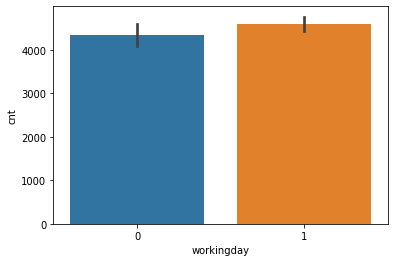

In [540]:
# people rent more bike during working day
sns.barplot(x='workingday'  , y = 'cnt' ,data = bikerentaldf)
plt.show()

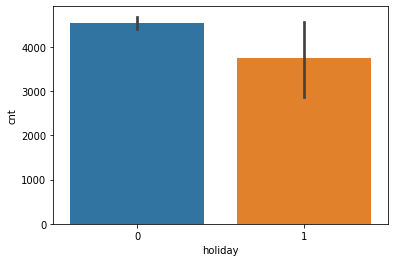

In [541]:
# people rent less bike during holiday
sns.barplot(x='holiday'  , y = 'cnt' ,data = bikerentaldf)
plt.show()

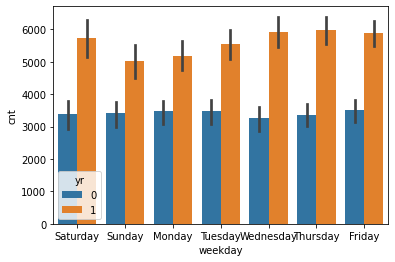

In [542]:
# plotting weekday and count year wise , we can see clearly 2019 is the winner
sns.barplot(x='weekday'  , y = 'cnt', hue = 'yr', data = bikerentaldf)
plt.show()

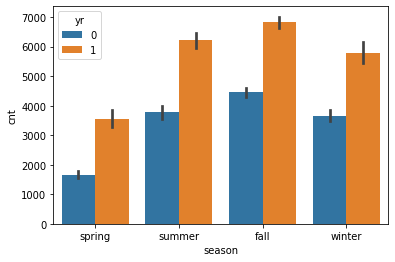

In [543]:
# plotting season and count year wise 
sns.barplot(x='season'  , y = 'cnt', hue = 'yr', data = bikerentaldf)
plt.show()

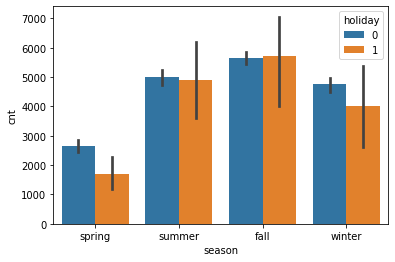

In [544]:
# plotting season and count holiday wise 
#Surprisingly  in  fall people rent more bike during holiday  and in winter and sprint less during holiday
sns.barplot(x='season'  , y = 'cnt', hue = 'holiday', data = bikerentaldf)
plt.show()

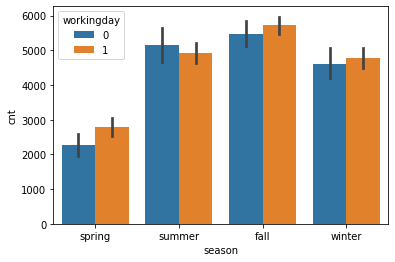

In [545]:
# plotting season and count holiday wise 
# in Summer season people rent more on not working day ,
# while in spring , fall and in winter people rent more bike during workingday  
sns.barplot(x='season'  , y = 'cnt', hue = 'workingday', data = bikerentaldf)
plt.show()

## Insights 
  - Summer and Fall season have high bike rental count
  - Better the weather , more the count of rental bikes
  - Bike rental count is increasing from jan to Jun , remains constant till sept and then decreasing
  - People rent more bikes in 2019 
  - In all the seasons people has rented bike more in 2019
  - people rent more bike during working day
  - people rent less bike during holiday
  - In fall season people rent more bike during holiday  and in Summer , Winter and Spring less during holiday
  - In Summer season people rent more on not working day ,while in spring , fall and in winter people rent more bike during  
    workingday 

# 3. Data preparation 
   -  Creating Dummy variables for Categories season , weathersit , mnth , weekday
   - split into train and test

In [546]:
# getting categorical variables
cat_variables=  bikerentaldf.select_dtypes(include=['category' , 'object']).columns.to_list()
cat_variables.remove('dteday')
cat_variables

['season', 'mnth', 'weekday', 'weathersit']

#### As we have to remove unnecessary columns dteday , instant , casual , registered
 -  we can see that casual and registered are also the count  of users , we have to build the model using total count users

In [547]:
# Remove unnecessary columns which are dte , instant , atemp
bikerentaldf = bikerentaldf.loc[:,~bikerentaldf.columns.isin(['dteday' , 'instant' , 'atemp' , 'casual' , 'registered'])]
bikerentaldf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


In [548]:
#Creating the dummies variable for above categories
brdf = pd.get_dummies(data = bikerentaldf , columns = cat_variables , drop_first=True)
print(brdf.shape)
brdf.head()


(730, 29)


,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Mist + Cloudy,weathersit_Light Snow
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Split the data set into train and test

In [549]:
#splitting the dataset to train and test 
df_train , df_test = train_test_split(brdf ,  train_size=0.7 , random_state =100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


## 4. Feature Scaling
  - fit and transform the numercial variables which are not in 0 and 1 term
  - lets apply min max scaler  which will scale the feature bw 0 and 1

In [550]:
#Feature scaling  - instatiate the object 
scl = MinMaxScaler()
# we need to scalre all the numerical variables along with target variable which is cnt 
num_vars = ['temp' ,'hum' ,'windspeed' ,'cnt'] 
#fit and transform  to df_train features
df_train[num_vars] = scl.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Mist + Cloudy,weathersit_Light Snow
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


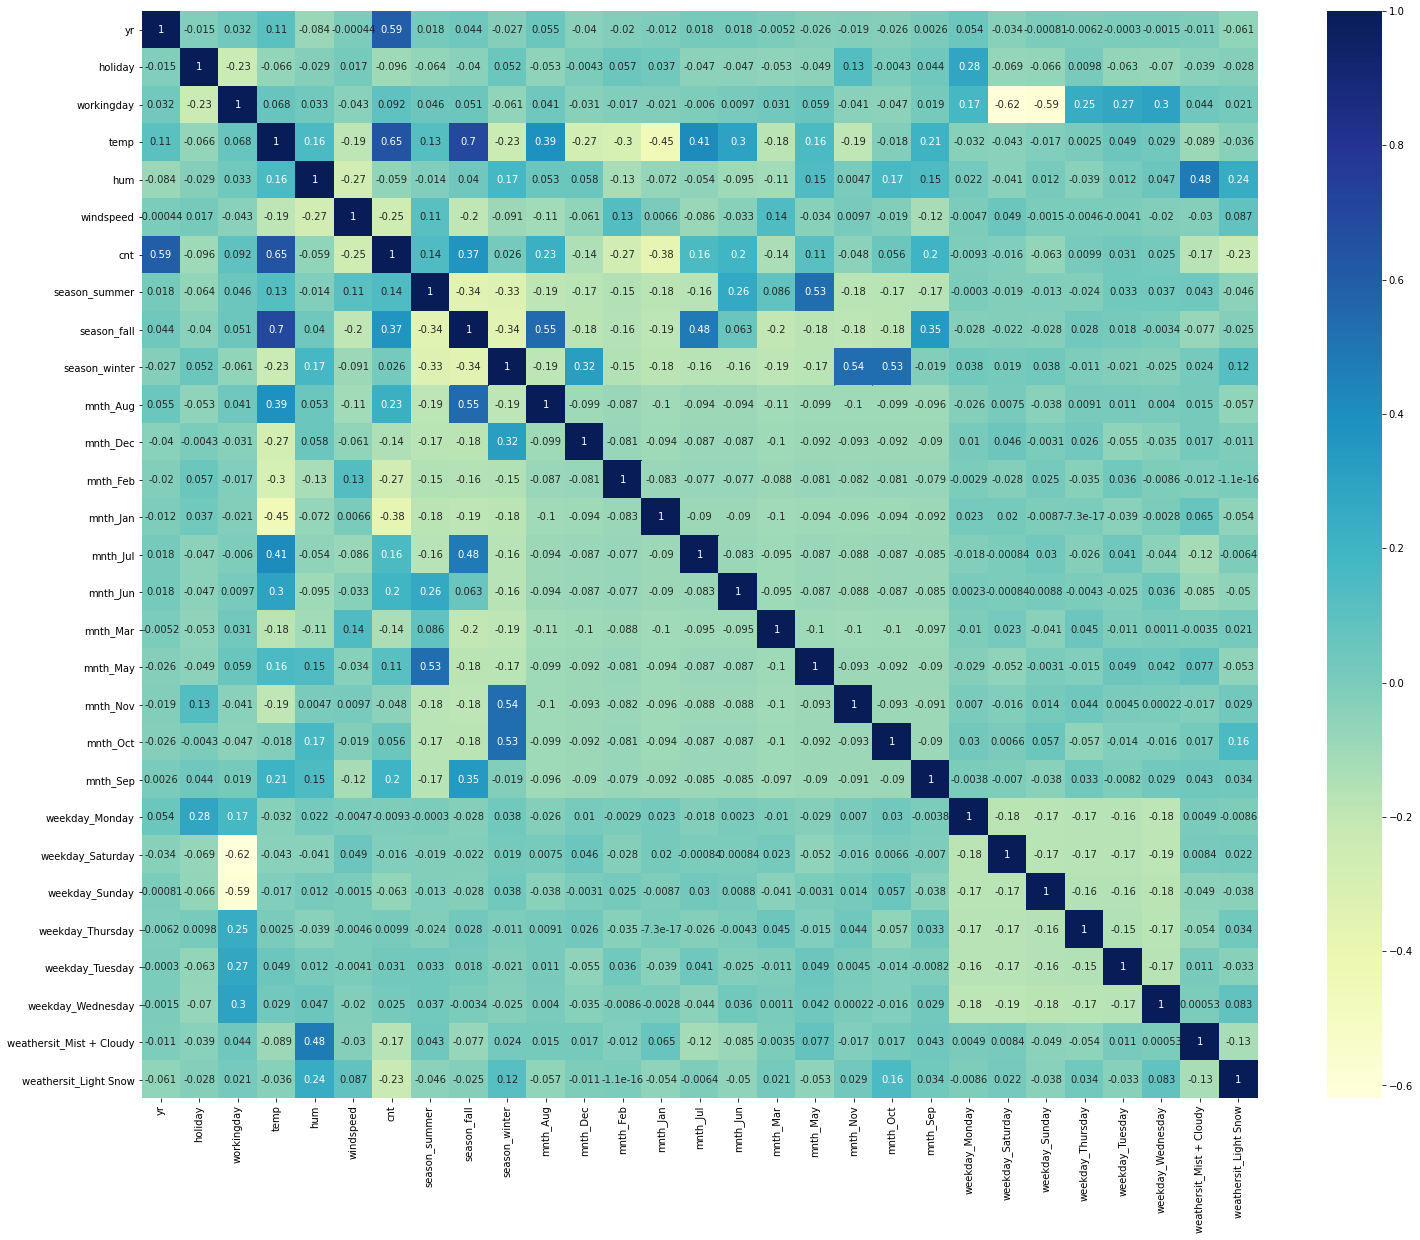

In [551]:
# lets see the correlation of df_train 
plt.figure(figsize= [25,20])
sns.heatmap(df_train.corr() , annot= True , cmap ='YlGnBu')
plt.show()

### As we can clearly see count has high coorelation for 
  - temp
  - yr
  - season fall
  

# 5. Model Building by RFE 
- Recursive feature elimination 
- as we know there are many variables so We will use RFE Technique to remove multicolinear feature 

In [552]:
y_train = df_train.pop('cnt')
X_train = df_train
print(X_train.shape)
X_train.head()


(510, 28)


,yr,holiday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Mist + Cloudy,weathersit_Light Snow
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [553]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [556]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)   
rfe = rfe.fit(X_train, y_train)

#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 10),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 12),
 ('weathersit_Mist + Cloudy', True, 1),
 ('weathersit_Light Snow', True, 1)]

In [557]:
# select the columns  for which  rfe support is true
col = X_train.columns[rfe.support_]
col


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_fall', 'season_winter', 'mnth_Jul', 'mnth_Sep',
       'weekday_Saturday', 'weekday_Sunday', 'weathersit_Mist + Cloudy',
       'weathersit_Light Snow'],
      dtype='object')

In [558]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Monday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [559]:
#final data set with RFE features
X_train_rfe = X_train[col]
print(X_train_rfe.shape)
X_train_rfe.head()

(510, 15)


,yr,holiday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,mnth_Jul,mnth_Sep,weekday_Saturday,weekday_Sunday,weathersit_Mist + Cloudy,weathersit_Light Snow
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,0,1,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,1,0


In [560]:
#lets create model with X_train_rfe
X_train_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train , X_train_sm)
lm_model = lr.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 30 Aug 2020   Prob (F-statistic):          2.11e-191
Time:                        12:45:01   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1551      0.022      7.152      0.000       0.112       0.198
yr                           0.2298      0.008     28.647      0.000       0.214       0.246
holiday                     -0.0296      0.021     -1.426      0.154      -0.070       0.011
workingday                   0.0726      0.009      8.293      0.000       0.055       0.090
temp                         0.5277      0.033     15.884      0.000       0.462       0.593
hum                         -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed                   -0.1809      0.025     -7.118      0.000      -0.231      -0.131
season_summer                0.1093      0.015      7.453      0.000       0.080       0.138
season_fall                  0.0555      0.021      2.698      0.007       0.015       0.096
season_winter                0.1548      0.013     12.346      0.000       0.130       0.179
mnth_Jul                    -0.0546      0.018     -3.019      0.003      -0.090      -0.019
mnth_Sep                     0.0820      0.017      4.966      0.000       0.050       0.114
weekday_Saturday             0.0826      0.011      7.577      0.000       0.061       0.104
weekday_Sunday               0.0295      0.012      2.565      0.011       0.007       0.052
weathersit_Mist + Cloudy    -0.0563      0.010     -5.425      0.000      -0.077      -0.036
weathersit_Light Snow       -0.2450      0.026     -9.395      0.000      -0.296      -0.194
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     6.93e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.18e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [561]:
#creating generic function for model summary
def CreateLinearModel(Xdf):
    X_train_sm = sm.add_constant(Xdf)
    lr = sm.OLS(y_train , X_train_sm)
    lr_model= lr.fit()
    return lr_model.summary()

In [562]:
# creating generic function to calculate the VIF
def calculateVIF(X_traindf):
    vif = pd.DataFrame()
    vif['Features'] = X_traindf.columns
    vif['VIF']  = [ variance_inflation_factor(X_traindf.values , i )  for i in range(X_traindf.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by ='VIF'  , ascending = False)
    return vif

In [563]:
#calculate the VIF 
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,30.85
11,weekday_Saturday,7.64
12,weekday_Sunday,7.54
7,season_fall,5.28
3,temp,3.62
6,season_summer,2.57
1,holiday,2.11
4,hum,1.91
8,season_winter,1.88
13,weathersit_Mist + Cloudy,1.57


## Removing the Features by  High p-value and low VIF priority
 

In [564]:
# as p value hihgest for holiday so removing  , even there is no change in R2 and Adjusted r Sq aftre removing
X_train_rfe = X_train_rfe.drop('holiday', axis = 1)
CreateLinearModel(X_train_rfe)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 30 Aug 2020   Prob (F-statistic):          2.11e-191
Time:                        12:45:02   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1255      0.036      3.502      0.001       0.055       0.196
yr                           0.2298      0.008     28.647      0.000       0.214       0.246
workingday                   0.1021      0.025      4.024      0.000       0.052       0.152
temp                         0.5277      0.033     15.884      0.000       0.462       0.593
hum                         -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed                   -0.1809      0.025     -7.118      0.000      -0.231      -0.131
season_summer                0.1093      0.015      7.453      0.000       0.080       0.138
season_fall                  0.0555      0.021      2.698      0.007       0.015       0.096
season_winter                0.1548      0.013     12.346      0.000       0.130       0.179
mnth_Jul                    -0.0546      0.018     -3.019      0.003      -0.090      -0.019
mnth_Sep                     0.0820      0.017      4.966      0.000       0.050       0.114
weekday_Saturday             0.1121      0.027      4.181      0.000       0.059       0.165
weekday_Sunday               0.0591      0.027      2.192      0.029       0.006       0.112
weathersit_Mist + Cloudy    -0.0563      0.010     -5.425      0.000      -0.077      -0.036
weathersit_Light Snow       -0.2450      0.026     -9.395      0.000      -0.296      -0.194
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         24.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [565]:
calculateVIF(X_train_rfe)

,Features,VIF
3,hum,26.31
2,temp,23.82
1,workingday,15.42
6,season_fall,7.15
4,windspeed,4.42
10,weekday_Saturday,4.20
11,weekday_Sunday,4.14
5,season_summer,3.41
7,season_winter,2.50
12,weathersit_Mist + Cloudy,2.22


## Removing the Features now on 2nd priority as all the p-values are low
 - Low pval and high VIF

In [566]:
# Removing humidity , Also after Removing humidity R-sq and adjusted R -sq doesnt decreases
X_train_rfe = X_train_rfe.drop('hum', axis = 1)
CreateLinearModel(X_train_rfe)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Sun, 30 Aug 2020   Prob (F-statistic):          1.28e-188
Time:                        12:45:02   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0353      0.030      1.192      0.234      -0.023       0.094
yr                           0.2337      0.008     28.828      0.000       0.218       0.250
workingday                   0.1029      0.026      3.983      0.000       0.052       0.154
temp                         0.4915      0.033     15.027      0.000       0.427       0.556
windspeed                   -0.1491      0.025     -6.024      0.000      -0.198      -0.100
season_summer                0.1132      0.015      7.600      0.000       0.084       0.142
season_fall                  0.0655      0.021      3.147      0.002       0.025       0.106
season_winter                0.1501      0.013     11.811      0.000       0.125       0.175
mnth_Jul                    -0.0496      0.018     -2.702      0.007      -0.086      -0.014
mnth_Sep                     0.0759      0.017      4.537      0.000       0.043       0.109
weekday_Saturday             0.1146      0.027      4.201      0.000       0.061       0.168
weekday_Sunday               0.0567      0.027      2.069      0.039       0.003       0.111
weathersit_Mist + Cloudy    -0.0822      0.009     -9.514      0.000      -0.099      -0.065
weathersit_Light Snow       -0.2895      0.024    -11.880      0.000      -0.337      -0.242
==============================================================================
Omnibus:                       66.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.148
Skew:                          -0.682   Prob(JB):                     6.17e-36
Kurtosis:                       5.402   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [567]:
calculateVIF(X_train_rfe)

,Features,VIF
2,temp,20.10
1,workingday,9.13
5,season_fall,6.95
3,windspeed,4.41
4,season_summer,3.37
9,weekday_Saturday,2.83
10,weekday_Sunday,2.67
6,season_winter,2.46
0,yr,2.06
7,mnth_Jul,1.60


In [568]:
# Lets Remove temp and see the effect , We can clearly see that after removing the temp, R-Sq decreases from 81 to 76 
#around 5 % change , hence let keep this column
X_train_rfe_1 = X_train_rfe.loc[:, ~X_train_rfe.columns.isin(['temp'])] 
CreateLinearModel(X_train_rfe_1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     137.9
Date:                Sun, 30 Aug 2020   Prob (F-statistic):          1.68e-149
Time:                        12:45:02   Log-Likelihood:                 412.53
No. Observations:                 510   AIC:                            -799.1
Df Residuals:                     497   BIC:                            -744.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1833      0.034      5.445      0.000       0.117       0.250
yr                           0.2473      0.010     25.463      0.000       0.228       0.266
workingday                   0.1068      0.031      3.431      0.001       0.046       0.168
windspeed                   -0.1713      0.030     -5.753      0.000      -0.230      -0.113
season_summer                0.2551      0.014     18.386      0.000       0.228       0.282
season_fall                  0.2989      0.017     17.903      0.000       0.266       0.332
season_winter                0.2225      0.014     15.696      0.000       0.195       0.250
mnth_Jul                    -0.0101      0.022     -0.460      0.646      -0.053       0.033
mnth_Sep                     0.0718      0.020      3.561      0.000       0.032       0.111
weekday_Saturday             0.1143      0.033      3.476      0.001       0.050       0.179
weekday_Sunday               0.0595      0.033      1.799      0.073      -0.005       0.124
weathersit_Mist + Cloudy    -0.0915      0.010     -8.813      0.000      -0.112      -0.071
weathersit_Light Snow       -0.3012      0.029    -10.262      0.000      -0.359      -0.244
==============================================================================
Omnibus:                       28.560   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.864
Skew:                          -0.321   Prob(JB):                     1.65e-13
Kurtosis:                       4.536   Cond. No.                         19.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### As we know temperature is important driver for the bike rental , many people will prefer renting the bike if temperature is good, very few people will opt renting in Winters when temperature decreseas
- If we remove the temperature , R-sq and adjusted R-sq decreases from 81 to 76 , around 5 % change which is huge change
- This is the proof that we should keep this column and try removing other features any , so lets keep it 

In [569]:
#Removing the next highest VIF working day
X_train_rfe_2 = X_train_rfe.loc[:, ~X_train_rfe.columns.isin(['workingday'])] 
CreateLinearModel(X_train_rfe_2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Sun, 30 Aug 2020   Prob (F-statistic):          2.06e-186
Time:                        12:45:03   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1322      0.017      7.709      0.000       0.099       0.166
yr                           0.2342      0.008     28.467      0.000       0.218       0.250
temp                         0.4928      0.033     14.847      0.000       0.428       0.558
windspeed                   -0.1513      0.025     -6.025      0.000      -0.201      -0.102
season_summer                0.1162      0.015      7.696      0.000       0.087       0.146
season_fall                  0.0681      0.021      3.225      0.001       0.027       0.110
season_winter                0.1497      0.013     11.609      0.000       0.124       0.175
mnth_Jul                    -0.0488      0.019     -2.618      0.009      -0.085      -0.012
mnth_Sep                     0.0723      0.017      4.264      0.000       0.039       0.106
weekday_Saturday             0.0157      0.011      1.370      0.171      -0.007       0.038
weekday_Sunday              -0.0421      0.012     -3.548      0.000      -0.065      -0.019
weathersit_Mist + Cloudy    -0.0802      0.009     -9.170      0.000      -0.097      -0.063
weathersit_Light Snow       -0.2848      0.025    -11.530      0.000      -0.333      -0.236
==============================================================================
Omnibus:                       80.355   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.836
Skew:                          -0.790   Prob(JB):                     7.39e-46
Kurtosis:                       5.699   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [570]:
calculateVIF(X_train_rfe_2)

,Features,VIF
1,temp,14.53
4,season_fall,6.81
3,season_summer,3.36
2,windspeed,3.35
5,season_winter,2.42
0,yr,2.02
6,mnth_Jul,1.60
10,weathersit_Mist + Cloudy,1.49
7,mnth_Sep,1.39
8,weekday_Saturday,1.21


## Again if we remove the working day , R-Sq and Adjusted r-SQ increases

In [571]:
# weekday_Saturday p -value is 0.1 now ,removing this feature
X_train_rfe_2 = X_train_rfe_2.loc[:, ~X_train_rfe_2.columns.isin(['weekday_Saturday'])] 
CreateLinearModel(X_train_rfe_2)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Sun, 30 Aug 2020   Prob (F-statistic):          3.37e-187
Time:                        12:45:03   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1352      0.017      7.938      0.000       0.102       0.169
yr                           0.2339      0.008     28.414      0.000       0.218       0.250
temp                         0.4917      0.033     14.805      0.000       0.426       0.557
windspeed                   -0.1497      0.025     -5.963      0.000      -0.199      -0.100
season_summer                0.1161      0.015      7.684      0.000       0.086       0.146
season_fall                  0.0682      0.021      3.227      0.001       0.027       0.110
season_winter                0.1500      0.013     11.625      0.000       0.125       0.175
mnth_Jul                    -0.0483      0.019     -2.587      0.010      -0.085      -0.012
mnth_Sep                     0.0723      0.017      4.260      0.000       0.039       0.106
weekday_Sunday              -0.0450      0.012     -3.847      0.000      -0.068      -0.022
weathersit_Mist + Cloudy    -0.0802      0.009     -9.161      0.000      -0.097      -0.063
weathersit_Light Snow       -0.2847      0.025    -11.513      0.000      -0.333      -0.236
==============================================================================
Omnibus:                       75.768   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.623
Skew:                          -0.732   Prob(JB):                     3.69e-45
Kurtosis:                       5.736   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [572]:
#checking VIF now 
calculateVIF(X_train_rfe_2)

,Features,VIF
1,temp,14.47
4,season_fall,6.81
3,season_summer,3.36
2,windspeed,3.28
5,season_winter,2.41
0,yr,2.02
6,mnth_Jul,1.59
9,weathersit_Mist + Cloudy,1.49
7,mnth_Sep,1.39
8,weekday_Sunday,1.16


In [573]:
# removing the season_fall  as VIF >5
X_train_rfe_2 = X_train_rfe_2.loc[:, ~X_train_rfe_2.columns.isin(['season_fall'])] 
CreateLinearModel(X_train_rfe_2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.3
Date:                Sun, 30 Aug 2020   Prob (F-statistic):          3.55e-186
Time:                        12:45:04   Log-Likelihood:                 493.94
No. Observations:                 510   AIC:                            -965.9
Df Residuals:                     499   BIC:                            -919.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1246      0.017      7.389      0.000       0.092       0.158
yr                           0.2325      0.008     28.023      0.000       0.216       0.249
temp                         0.5718      0.022     25.661      0.000       0.528       0.616
windspeed                   -0.1559      0.025     -6.170      0.000      -0.206      -0.106
season_summer                0.0823      0.011      7.490      0.000       0.061       0.104
season_winter                0.1260      0.011     11.845      0.000       0.105       0.147
mnth_Jul                    -0.0362      0.018     -1.962      0.050      -0.072    5.14e-05
mnth_Sep                     0.0875      0.016      5.318      0.000       0.055       0.120
weekday_Sunday              -0.0456      0.012     -3.865      0.000      -0.069      -0.022
weathersit_Mist + Cloudy    -0.0795      0.009     -8.991      0.000      -0.097      -0.062
weathersit_Light Snow       -0.2822      0.025    -11.315      0.000      -0.331      -0.233
==============================================================================
Omnibus:                       67.260   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.251
Skew:                          -0.698   Prob(JB):                     7.14e-35
Kurtosis:                       5.334   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [574]:
#checking VIF , temperature VIF got reduced
calculateVIF(X_train_rfe_2)

,Features,VIF
1,temp,5.10
2,windspeed,3.09
0,yr,2.01
3,season_summer,1.76
5,mnth_Jul,1.52
8,weathersit_Mist + Cloudy,1.49
4,season_winter,1.46
6,mnth_Sep,1.29
7,weekday_Sunday,1.16
9,weathersit_Light Snow,1.08


In [575]:
# removing the mnth_Jul  as p-value came around 0.050
X_train_rfe_2 = X_train_rfe_2.loc[:, ~X_train_rfe_2.columns.isin(['mnth_Jul'])] 
#Create model again 
X_train_sm = sm.add_constant(X_train_rfe_2)
lr = sm.OLS( y_train , X_train_sm)
lr_model_final = lr.fit()
lr_model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.8
Date:                Sun, 30 Aug 2020   Prob (F-statistic):          1.41e-186
Time:                        12:45:04   Log-Likelihood:                 491.98
No. Observations:                 510   AIC:                            -964.0
Df Residuals:                     500   BIC:                            -921.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1285      0.017      7.644      0.000       0.095       0.161
yr                           0.2331      0.008     28.030      0.000       0.217       0.249
temp                         0.5522      0.020     27.660      0.000       0.513       0.591
windspeed                   -0.1552      0.025     -6.127      0.000      -0.205      -0.105
season_summer                0.0892      0.010      8.565      0.000       0.069       0.110
season_winter                0.1297      0.010     12.364      0.000       0.109       0.150
mnth_Sep                     0.0959      0.016      6.012      0.000       0.065       0.127
weekday_Sunday              -0.0464      0.012     -3.925      0.000      -0.070      -0.023
weathersit_Mist + Cloudy    -0.0786      0.009     -8.877      0.000      -0.096      -0.061
weathersit_Light Snow       -0.2833      0.025    -11.326      0.000      -0.332      -0.234
==============================================================================
Omnibus:                       71.433   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.962
Skew:                          -0.739   Prob(JB):                     5.55e-37
Kurtosis:                       5.382   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [576]:
#checking VIF , temperature VIF got reduced
calculateVIF(X_train_rfe_2)

,Features,VIF
1,temp,3.72
2,windspeed,3.06
0,yr,2.00
3,season_summer,1.57
7,weathersit_Mist + Cloudy,1.48
4,season_winter,1.38
5,mnth_Sep,1.20
6,weekday_Sunday,1.16
8,weathersit_Light Snow,1.08


In [590]:
#model coefficients
lr_model_final.params.sort_values(ascending=False)

temp                        0.552174
yr                          0.233084
season_winter               0.129723
const                       0.128458
mnth_Sep                    0.095875
season_summer               0.089238
weekday_Sunday             -0.046400
weathersit_Mist + Cloudy   -0.078571
windspeed                  -0.155211
weathersit_Light Snow      -0.283276
dtype: float64

In [591]:
# removing the seasonwinter  
X_train_rfe_4 = X_train_rfe_2.loc[:, ~X_train_rfe_2.columns.isin(['season_winter'])] 
#Create model again 
X_train_sm = sm.add_constant(X_train_rfe_4)
lr = sm.OLS( y_train , X_train_sm)
lr_model_final = lr.fit()
lr_model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     220.9
Date:                Sun, 30 Aug 2020   Prob (F-statistic):          6.76e-159
Time:                        13:07:29   Log-Likelihood:                 423.95
No. Observations:                 510   AIC:                            -829.9
Df Residuals:                     501   BIC:                            -791.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2055      0.018     11.537      0.000       0.171       0.241
yr                           0.2339      0.009     24.641      0.000       0.215       0.253
temp                         0.5021      0.022     22.502      0.000       0.458       0.546
windspeed                   -0.1915      0.029     -6.667      0.000      -0.248      -0.135
season_summer                0.0511      0.011      4.498      0.000       0.029       0.073
mnth_Sep                     0.0868      0.018      4.772      0.000       0.051       0.123
weekday_Sunday              -0.0408      0.013     -3.026      0.003      -0.067      -0.014
weathersit_Mist + Cloudy    -0.0747      0.010     -7.394      0.000      -0.094      -0.055
weathersit_Light Snow       -0.2463      0.028     -8.688      0.000      -0.302      -0.191
==============================================================================
Omnibus:                        8.874   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.559
Skew:                          -0.247   Prob(JB):                      0.00840
Kurtosis:                       3.453   Cond. No.                         9.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Now our model is completed and above are final variables 
- "lr_model_final" is the final model
- All features statsifies the p - value significance 
- Also VIF <5 for all the variables
- F statistic is close to zero  , so overall model fit  is good
- R square and Adjusted r squared are almost similar  

In [577]:
#Final features
X_train_rfe_2.columns

Index(['yr', 'temp', 'windspeed', 'season_summer', 'season_winter', 'mnth_Sep',
       'weekday_Sunday', 'weathersit_Mist + Cloudy', 'weathersit_Light Snow'],
      dtype='object')

# Residual Analysis

In [578]:
# y train predicted  value 
X_train_rfe_sm = sm.add_constant(X_train_rfe_2)
y_train_pred = lr_model_final.predict(X_train_rfe_sm)
y_train_pred.head()

576    0.770575
426    0.487617
728    0.347559
482    0.561433
111    0.270948
dtype: float64

Text(0.5, 0, 'Errors')

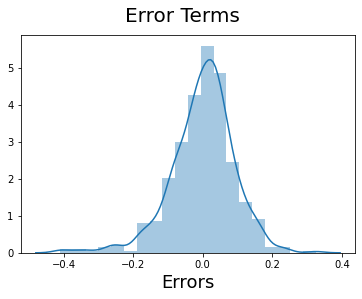

In [579]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)      

### As we can see error terms are normally distributed

# Prediction 

In [580]:
# Apply scaling on test set 
#Feature scaling  - instatiate the object 

# we need to scalre all the numerical variables along with target variable which is cnt 
num_vars1 = ['temp' ,'hum' ,'windspeed' ,'cnt'] 
#fit and transform  to df_train features
df_test[num_vars1] = scl.transform(df_test[num_vars1])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Mist + Cloudy,weathersit_Light Snow
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [581]:
# getting X_test , y_tes
y_test = df_test.pop('cnt')
X_test = df_test
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Mist + Cloudy,weathersit_Light Snow
184,0,1,0,0.831783,0.657364,0.084219,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [582]:
## getting only those columns which our final model gave us ( Final Drivers)
#creating new dataframe X_test_new
X_test_new = X_test[X_train_rfe_2.columns]
X_test_new.head()

,yr,temp,windspeed,season_summer,season_winter,mnth_Sep,weekday_Sunday,weathersit_Mist + Cloudy,weathersit_Light Snow
184,0,0.831783,0.084219,0,0,0,0,1,0
535,1,0.901354,0.153728,1,0,0,0,0,0
299,0,0.511964,0.334206,0,1,0,0,1,0
221,0,0.881625,0.339570,0,0,0,0,0,0
152,0,0.817246,0.537414,1,0,0,0,0,0


In [583]:
#Make predicitons
X_test_new_sm = sm.add_constant(X_test_new)
y_test_pred = lr_model_final.predict(X_test_new_sm)
y_test_pred.head()

184    0.496104
535    0.924625
299    0.410430
221    0.562564
152    0.585546
dtype: float64

In [584]:
#Calculate the R square of test set
r2score = r2_score(y_test , y_test_pred)
print( "R squared for test set is : ",round(r2score ,4))



R squared for test set is :  0.7925


## As we can see R squared of test set is very close to train set 

In [585]:
#Calcualting the Adjusted R sq
n= X_test_new.shape[0] # sample Size 
p = 9 # final predicted variables 
Ad =1 - (((1-r2score)*(n - 1))/(n - p-1))
print( "Adjusted R squared for test set is : ",round(Ad ,4))

Adjusted R squared for test set is :  0.7836


# 6. Model Evaluation

<Figure size 432x288 with 0 Axes>

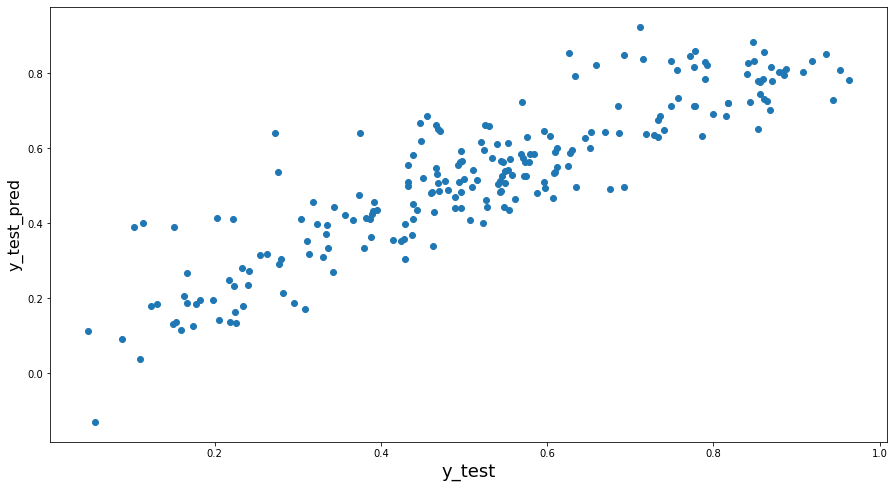

In [586]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))

plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16) 
plt.show()  # Y-label

In [587]:
print( "Rsq difference : " ,round(0.831-0.793,4))
print( "AdRsq difference : " ,round(0.828-0.783,4))

Rsq difference :  0.038
AdRsq difference :  0.045


# 7. Results
 - R squared of train set = 0.831  , Adjusted R-Sq = 0.828
 - R sqaured of test set = 0.793   , Adjusted R-sq = 0.783
 
 - It shows that  3.8  and 4.5 %  difference  in R-sq and Ad R-Sq which is less than 5 %
 - Hence this is good model 
 
## Final Drivers 
 -  Below are the list of final indicators/drivers which company can suggest to management team to makee any strategic business     plan
 
    - temp	
    - windspeed
    - yr
    - season_summer	
    - weathersit_Mist + Cloudy	
    - season_winter
    - mnth_Sep
    - weekday_Sunday
    - weathersit_Light Snow	